In [1]:
%matplotlib nbagg

In [2]:
import numpy as np
from ncempy.io.dm import fileDM
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
from libertem_holo.base.reconstr import (
    aperture_function, freq_array, get_aperture, reconstruct_frame,
    estimate_sideband_position, estimate_sideband_size
)
from libertem_holo.base.filters import highpass, exclusion_mask, clipped, remove_dead_pixels

In [4]:
with fileDM("/home/alex/Data/dm/alpha-50_obj.dm3") as f:
    data = f.getDataset(0)

In [5]:
img = data['data'][0]

<IPython.core.display.Javascript object>


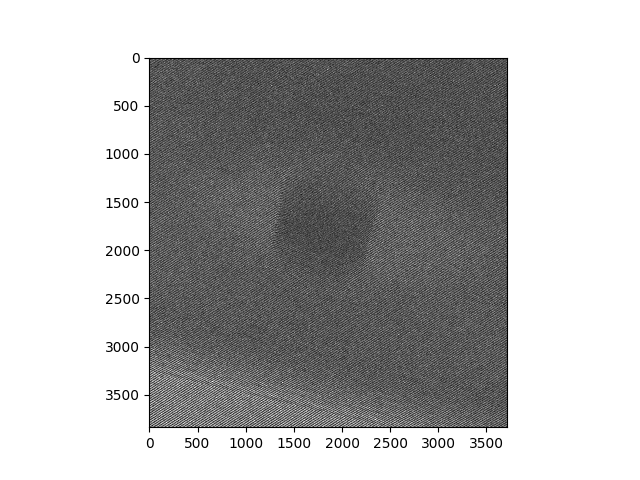

In [6]:
plt.figure()
plt.imshow(np.abs(img), vmax=np.max(clipped(img)), interpolation='nearest', cmap='gray')

<IPython.core.display.Javascript object>


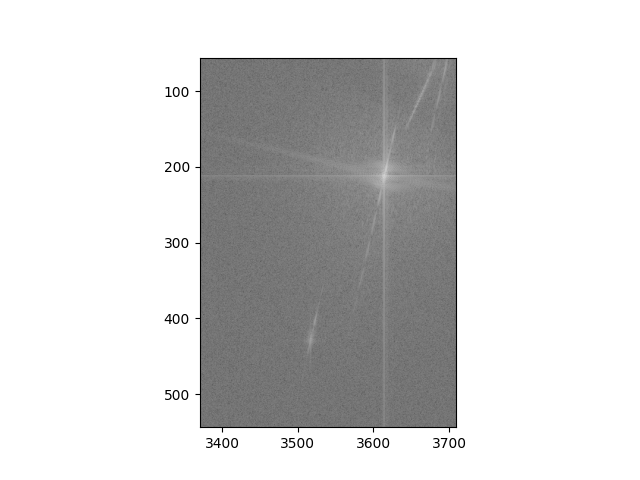

In [7]:
plt.figure()
plt.imshow(np.abs(np.fft.ifft2(img)), norm=LogNorm(), cmap='gray')

In [10]:
sb_position = estimate_sideband_position(img, holo_sampling=(1, 1))

In [11]:
sb_size = estimate_sideband_size(sb_position, img.shape, sb_size_ratio=0.5)

In [12]:
sb_size, sb_position

(115.90621208546158, array([ 211, 3614]))

In [13]:
out_shape = (256, 256)
slice_fft, aperture = get_aperture(out_shape=out_shape, sb_size=sb_size, sb_smoothness=15, sig_shape=img.shape)

In [14]:
wav = reconstruct_frame(img, sb_pos=sb_position, slice_fft=slice_fft, aperture=aperture)

<IPython.core.display.Javascript object>


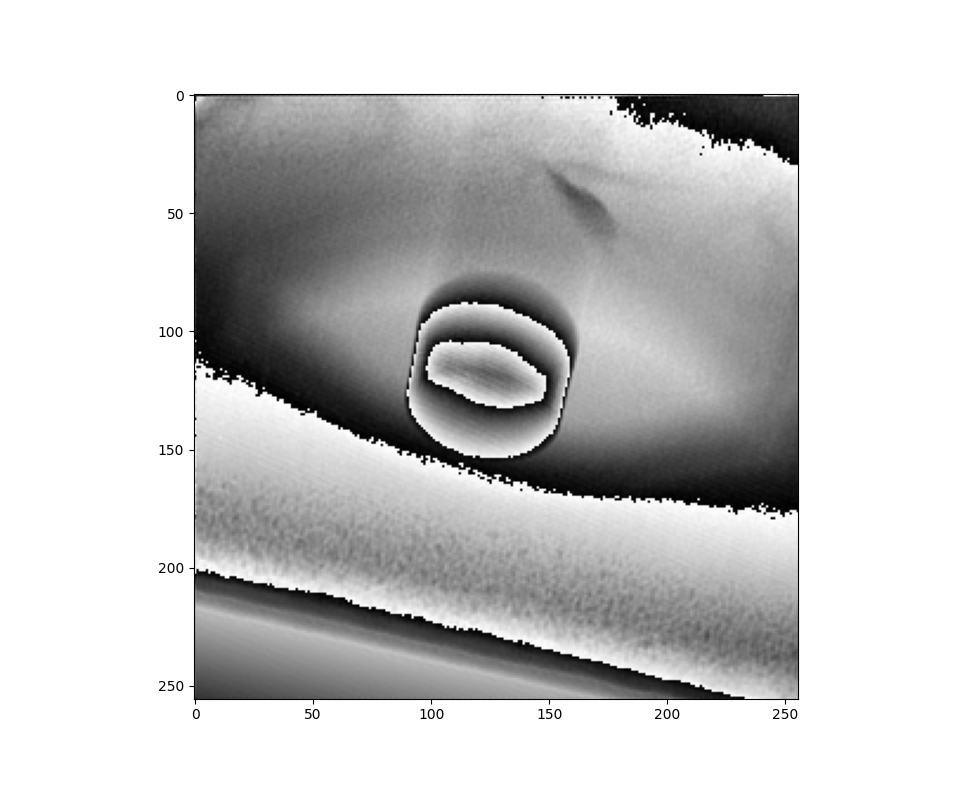

In [17]:
plt.figure()
plt.imshow(np.angle(wav), cmap='gray')

In [19]:
from skimage.restoration import unwrap_phase

In [21]:
unwrapped = unwrap_phase(np.angle(wav))

<IPython.core.display.Javascript object>


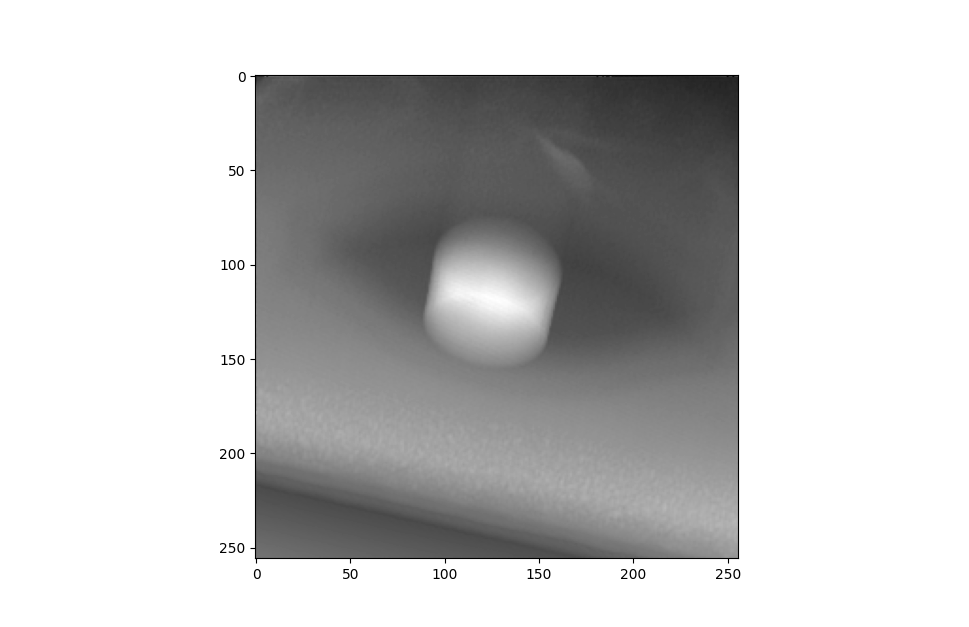

In [24]:
plt.figure()
plt.imshow(np.max(unwrapped) - unwrapped, cmap='gray')